<a href="https://colab.research.google.com/github/sampsonola/All-In-One-Python-Projects/blob/main/titanic_a_detailed_classification_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **Titanic Survival : A Detailed Classification Pipeline**

# **1. The Problem Statement** <a class="anchor" id="1"></a>


- The first step in a machine learning model development is to define the problem statement. It is a necessary step as it will help us to stay focused and move in the right direction.

- So, in this case the problem statement is to predict how many people survive the titanic shipwreck disaster.


# **2. Basic Set Up** <a class="anchor" id="2"></a>

## **2.1 Import Libraries** <a class="anchor" id="2.1"></a>


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data processing and analysis
import numpy as np
import pandas as pd
import math
import re


# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go



# Configure visualisations
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)


# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb


# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale, LabelEncoder, OneHotEncoder


# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2.2 Read Dataset** <a class="anchor" id="2.2"></a>




In [ ]:
# Load train and Test set

%time

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
IDtest = test['PassengerId']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


# **3. Data Exploration** <a class="anchor" id="3"></a>

## **3.1 Explore the training set** <a class="anchor" id="3.1"></a>


### **View shape of training set**

In [ ]:
print('The shape of the training set : {} '.format(train.shape))

The shape of the training set : (891, 12) 


### **Preview training set**

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **View concise summary of training set**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- It seems that several of the variables - `Age`, `Cabin` and `Embarked` contain missing values. Let's check it.

### **Print variables containing missing values**

In [ ]:
var1 = [col for col in train.columns if train[col].isnull().sum() != 0]

print(train[var1].isnull().sum())

Age         177
Cabin       687
Embarked      2
dtype: int64


- So, we are right that `Age`, `Cabin` and `Embarked` contain missing values.

### **View statistical properties of training set**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Types of Variables**


- Now, we will classify the variables into categorical and numerical variables.

In [ ]:
# find categorical variables

categorical = [var for var in train.columns if train[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables in training set.

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# find numerical variables

numerical = [var for var in train.columns if train[var].dtype !='O']

print('There are {} numerical variables in training set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables in training set.

The numerical variables are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## **3.2 Explore the test set** <a class="anchor" id="3.2"></a>

### **View shape of test set**

In [ ]:
print('The shape of the test set : {} '.format(test.shape))

The shape of the test set : (418, 11) 


### **Preview test set**

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **View concise summary of test set**

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### **Print variables containing missing values**

In [ ]:
var2 = [col for col in test.columns if test[col].isnull().sum() != 0]

print(test[var2].isnull().sum())

Age       86
Fare       1
Cabin    327
dtype: int64


- So, we are right that `Age`, `Cabin` and `Embarked` contain missing values.

### **View statistical properties of test set**

In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### **Types of Variables**


- Now, we will classify the variables into categorical and numerical variables.

In [ ]:
# find categorical variables

categorical = [var for var in test.columns if test[var].dtype =='O']

print('There are {} categorical variables in test set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables in test set.

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# find numerical variables

numerical = [var for var in test.columns if test[var].dtype !='O']

print('There are {} numerical variables in test set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables in test set.

The numerical variables are : ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# **4. Data Visualization** <a class="anchor" id="4"></a>

## **4.1 Survived** <a class="anchor" id="4.2"></a>

In [ ]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- Here `0 stands for not survived` and `1 stands for survived`.

- So, 549 people did not survived and 342 survived.

- Let's visualize it by plotting.

In [ ]:
# Count the occurrences of each class
counts = train['Survived'].value_counts().sort_index()

# Create the Plotly plot
fig = go.Figure(data=[
    go.Bar(x=counts.index, y=counts.values, text=counts.values, textposition='outside')
])

fig.update_layout(
    title='Distribution of people who survived',
    xaxis_title='Survived',
    yaxis_title='Count',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Did not survive', 'Survived']
    ),
    template='plotly_white',
    width=700
)

fig.show()


- Now females have higher probability of survival than males.
- Let' check it

In [ ]:
grouped = train.groupby('Survived')['Sex'].value_counts().reset_index()
grouped

,Survived,Sex,count
0,0,male,468
1,0,female,81
2,1,female,233
3,1,male,109


In [ ]:
# Create a Plotly bar plot with grouping by 'Sex'
fig = px.bar(
    grouped,
    x='Survived',
    y='count',
    color='Sex',
    barmode='group',
    title='Distribution of people who survived',
    labels={'Survived': 'Survived', 'count': 'Count'},
    text_auto=True, width=700
)


# Show the plot
fig.show()


- Let's check the percentage of survival for males and females separately.

In [ ]:
females = train[train['Sex'] == 'female']
females.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
females['Survived'].value_counts()/len(females)

Survived
1    0.742038
0    0.257962
Name: count, dtype: float64

In [ ]:
males = train[train['Sex'] == 'male']
males.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
males['Survived'].value_counts()/len(males)

Survived
0    0.811092
1    0.188908
Name: count, dtype: float64

- As expected females have higher probability of survival (value 1) 74.20% than males 18.89%.

In [ ]:
# Separate data for females and males
females = train[train['Sex'] == 'female']
males = train[train['Sex'] == 'male']

# Create pie chart for females
fig_females = px.pie(females, names='Survived', title='Percentage of females who survived',
                     color_discrete_sequence=['cyan', 'pink'], width=700,
                     labels={'Survived': 'Survival Status'})

# Create pie chart for males
fig_males = px.pie(males, names='Survived', title='Percentage of males who survived',
                   color_discrete_sequence=['pink', 'cyan'], width=700,
                   labels={'Survived': 'Survival Status'})

# Show the plots
fig_females.show()
fig_males.show()


- From the above pie-charts, we can deduce that females probability of survival is 74.2% (cyan color) while males probability of survival is 18.9% (cyan color).

## **4.3 Sex** <a class="anchor" id="4.3"></a>


In [ ]:
sex = train['Sex'].value_counts().reset_index()
sex

,Sex,count
0,male,577
1,female,314


In [ ]:
# Create a bar chart using Plotly Express
fig = px.bar(sex, x='Sex', y= 'count', title='Distribution of sex among passengers',
             color='Sex', width=700,
             text_auto=True)

# # Update layout to rotate x-axis labels
# fig.update_layout(xaxis_tickangle=30)

# Update traces to add text labels
fig.update_traces(textposition='outside')

# Show the plot
fig.show()


In [ ]:
train['Sex'].value_counts()/len(train)

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

In [ ]:
# Create a pie chart using Plotly Express
fig = px.pie(train, names='Sex', title='Percentage distribution of sex among passengers',
             color='Sex', color_discrete_sequence=['cyan', 'pink'], width=700,
             hole=0.3,
             labels={'Sex': 'Sex'})

# Show the plot
fig.show()


In [ ]:
train.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

## **4.4 Pclass** <a class="anchor" id="4.4"></a>

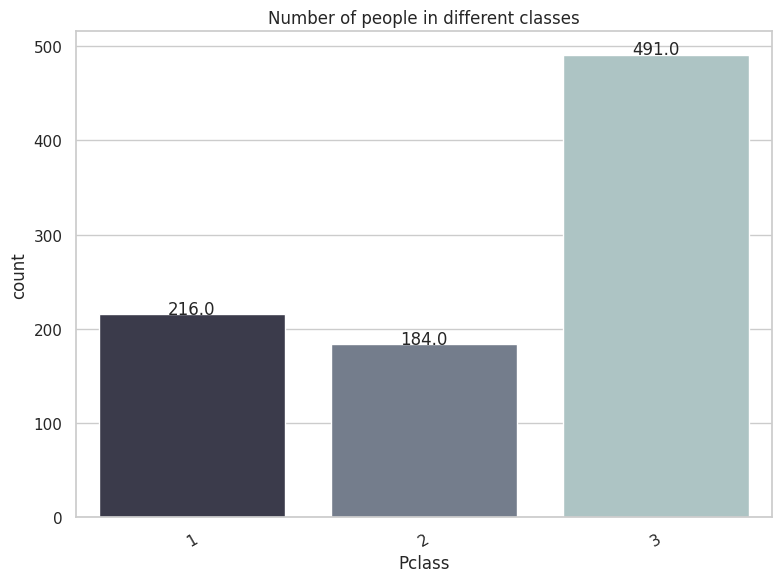

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Pclass'], data=train, palette = 'bone')
graph.set_title('Number of people in different classes', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

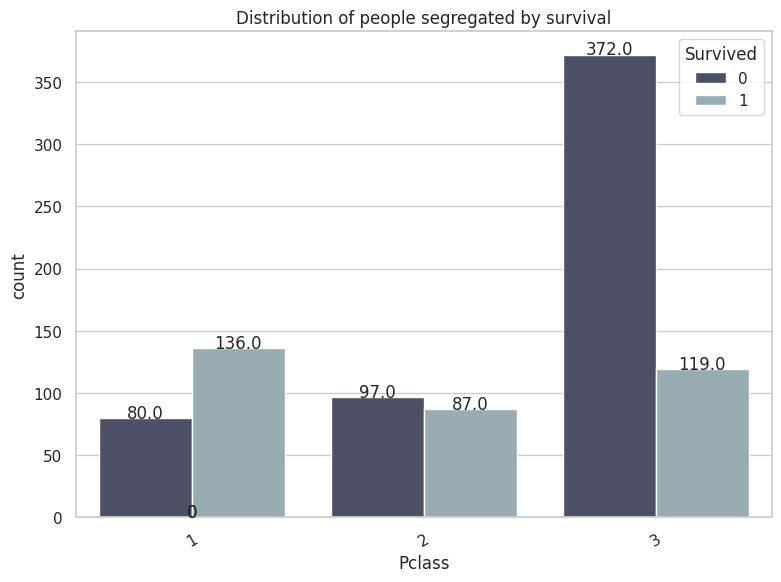

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Pclass'], data=train, hue='Survived', palette = 'bone')
graph.set_title('Distribution of people segregated by survival', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

- Here `0 stands for not survived` and `1 stands for survived`.

- So, we can see that `Pclass` plays a major role in survival.

- Majority of people survived in `Pclass 1` while a large number of people do not survive in `Pclass 3`.

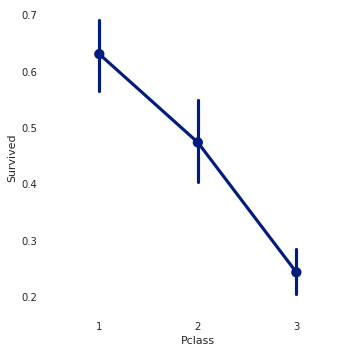

In [ ]:
# percentage of survivors per class
sns.factorplot('Pclass', 'Survived', data = train)

The above plot indicates the percentage of survivors per class.

## **4.5 Embarked** <a class="anchor" id="4.5"></a>

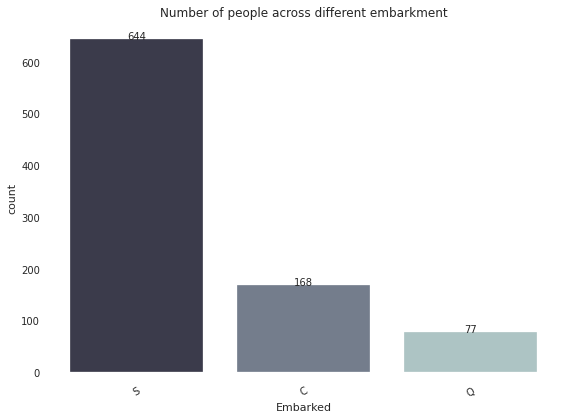

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Embarked'], data=train, palette = 'bone')
graph.set_title('Number of people across different embarkment', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

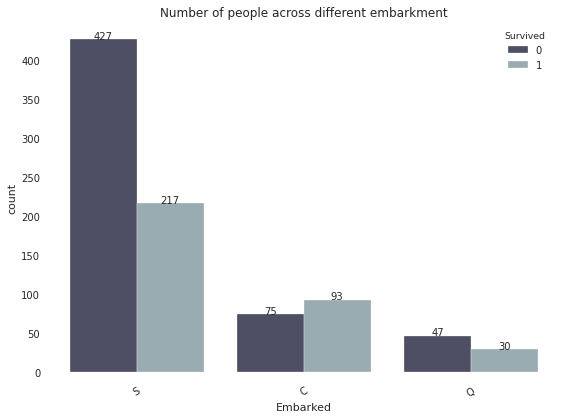

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Embarked'], data=train, hue='Survived', palette = 'bone')
graph.set_title('Number of people across different embarkment', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

- We can see that port of embarkment plays a major role in survival probability.

## **4.6 Age** <a class="anchor" id="4.6"></a>

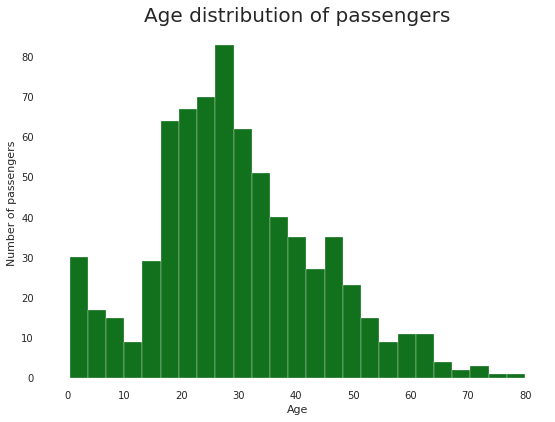

In [ ]:
x = train['Age']
plt.figure(figsize=(8,6))
plt.hist(x, bins=25, color='g')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age distribution of passengers', fontsize = 20)
plt.show()

- We can see that majority of passengers are aged between 20 and 40.

- We will again visit this data visualization section in Feature Engineering section.

# **5. Data Preprocessing** <a class="anchor" id="5"></a>

## **5.1 Remove redundant features** <a class="anchor" id="5.1"></a>

- The `Ticket` and `PassengerId` are redundant features. So, we will remove them from the dataset.

In [ ]:
train.drop(['Ticket', 'PassengerId'], axis = 1, inplace = True)
test.drop(['Ticket','PassengerId'], axis = 1, inplace = True)

## **5.2 Imputation of missing values in Age** <a class="anchor" id="5.2"></a>

- We will make additional column with the title of the person (Mr, Mrs, Miss, etc).

- Then, we impute the missing values in age with the median age for each title.

- Let's first make a function to extract title from `Name` feature.

In [ ]:
# function to extract title from Name feature
def passenger_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

In [ ]:
# extract title
train['Title'] = train['Name'].apply(passenger_title)
test['Title'] = test['Name'].apply(passenger_title)

In [ ]:
# fill missing age, with median from title segregation: funtion
def fill_age(passenger):

    # determine age by group
    temp = train.groupby(train.Title).median(numeric_only=True)

    age, title = passenger

    if age == age:
        return age
    else:
        if title == 'Mr':
            return temp.Age['Mr']
        elif title == 'Miss':
            return temp.Age['Miss']
        elif title == ['Mrs']:
            return temp.Age['Mrs']
        elif title == 'Master':
            return temp.Age['Master']
        else:
            return temp.Age['Other']

In [ ]:
# fill age according to title
train['Age'] = train[['Age', 'Title']].apply(fill_age, axis = 1)
test['Age'] = test[['Age', 'Title']].apply(fill_age, axis = 1)

In [ ]:
# Remove column Name, it is not useful for predictions and we extracted the title already
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [ ]:
# Remove column Title, it is not useful for predictions and we imputed the age already
train.drop('Title', axis = 1, inplace = True)
test.drop('Title', axis = 1, inplace = True)

## **5.3 Imputation of missing values in Cabin** <a class="anchor" id="5.3"></a>

- To extract missing values in Cabin, we extract Deck from Cabin and add 'Unknown' where NA.


In [ ]:
def isNaN(num):
    return num != num # checks if cell is NaN

In [ ]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# get the first letter of cabin
def first_letter_of_cabin(cabin):
    if not isNaN(cabin):
        return cabin[0]
    else:
        return 'Unknown'

In [ ]:
train['Deck'] = train['Cabin'].apply(first_letter_of_cabin)
test['Deck'] = test['Cabin'].apply(first_letter_of_cabin)

In [ ]:
# drop old variable Cabin
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

## **5.4 Imputation of missing values in Embarked** <a class="anchor" id="5.4"></a>

- We impute Embarked with the most frequent port (S).

In [ ]:
train["Embarked"].fillna("S", inplace = True)
test['Embarked'].fillna("S", inplace = True)

### **Let's again check for missing values**

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Deck        0
dtype: int64

In [ ]:
#we can replace missing value in fare by taking median of all fares of those passengers
#who share 3rd Passenger class and Embarked from 'S'
test['Fare'].fillna(test['Fare'].median(), inplace = True)


In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

## **5.5 Outlier Detection** <a class="anchor" id="5.5"></a>


- The `Age` and `Fare` variable contain putliers. Now, let's check for outliers in `Age` and `Fare`.

- Let's draw boxplots to visualise outliers in the above variables.


In [ ]:
# Create boxplot for Age
fig_age = px.box(train, y='Age', title='Age Boxplot', width=700)
fig_age.show()

# Create boxplot for Fare
fig_fare = px.box(train, y='Fare', title='Fare Boxplot', width=700)
fig_fare.show()


In [ ]:
# find outliers in Age variable

IQR = train.Age.quantile(0.75) - train.Age.quantile(0.25)
Lower_fence = train.Age.quantile(0.25) - (IQR * 3)
Upper_fence = train.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=max(0, Lower_fence), upperboundary=Upper_fence))

Age outliers are values < 0 or > 81.0


In [ ]:
# find outliers in Fare variable

IQR = train.Fare.quantile(0.75) - train.Fare.quantile(0.25)
Lower_fence = train.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = train.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=max(0, Lower_fence), upperboundary=Upper_fence))

Fare outliers are values < 0 or > 100.2688


- Since, `Age` and `Fare` do not have values less than 0. So, we assume their minimum values to be 0.

- I will use top-coding approach to cap maximum values and remove outliers from the above variables.



In [ ]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [train, test]:
    df['Age'] = max_value(df, 'Age', 81.0)
    df['Fare'] = max_value(df, 'Fare', 100.2688)


- Let's check that the above variables are capped at their maximum values.

In [ ]:
train.Age.max(), test.Age.max()

(80.0, 76.0)

In [ ]:
train.Fare.max(), test.Fare.max()

(100.2688, 100.2688)

# **6. Feature Engineering** <a class="anchor" id="6"></a>

- In this section, we will make additional columns for future analysis.

## **6.1 Categorize passengers as male, female or child** <a class="anchor" id="6.1"></a>

- Children have much larger probability of survival than men or women. So, we will categorize the passengers as men, women or child.

In [ ]:
# label minors as child, and remaining people as female or male
def male_female_child(passenger):
    # take the age and sex
    age, sex = passenger

    # compare age, return child if under 16, otherwise leave sex
    if age < 16:
        return 'child'
    else:
        return sex

In [ ]:
# new columns called person specifying if the person was female, male or child
train['Person'] = train[['Age', 'Sex']].apply(male_female_child, axis = 1)
test['Person'] = test[['Age', 'Sex']].apply(male_female_child, axis = 1)


In [ ]:
# Number of male, female and children on board
train['Person'].value_counts()

Person
male      533
female    271
child      87
Name: count, dtype: int64

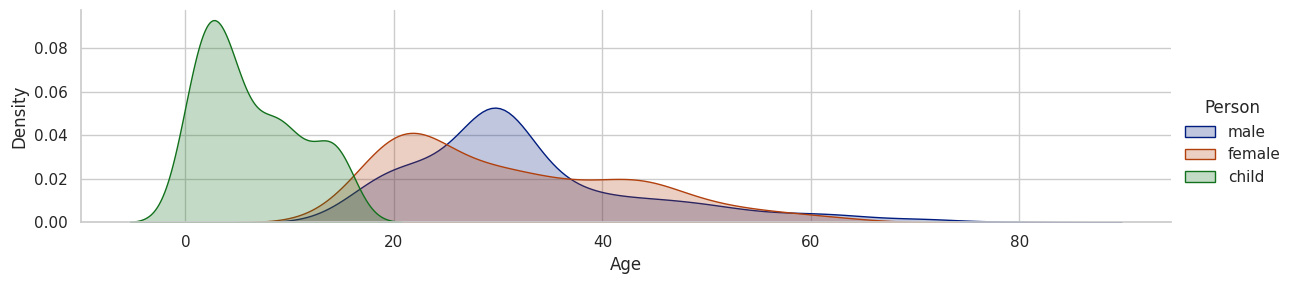

In [ ]:
# age segregated by class
fig = sns.FacetGrid(train, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

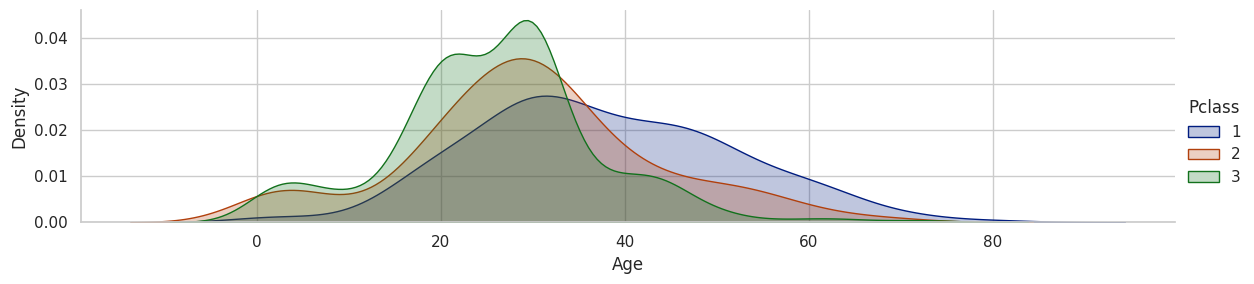

In [ ]:
# age segregated by class
fig = sns.FacetGrid(train, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

- We can see that the peak over 0 age for classes 2 and 3, coincides with the classes that had children. Class 1 did not have a lot of children, unsurprisingly. Note also, that older people were high class.

## **6.2 Make additional variable : travel alone** <a class="anchor" id="6.2"></a>

[Notebook Contents](#0.1)


In [ ]:
def travel_alone(df):
    df['Alone'] = df.Parch + df.SibSp
    df['Alone'].loc[df['Alone'] > 0] = 'With Family'
    df['Alone'].loc[df['Alone'] == 0] = 'Alone'

    return df

- `0` indicates that person is travelling with family and `1` indicates that he is travelling alone.

In [ ]:
train = travel_alone(train)
test = travel_alone(test)

In [ ]:
# check how many passengers are travelling with family and alone
train['Alone'].value_counts()

Alone
Alone          537
With Family    354
Name: count, dtype: int64

- So, 537 people are travelling alone and 354 people are travelling with family.

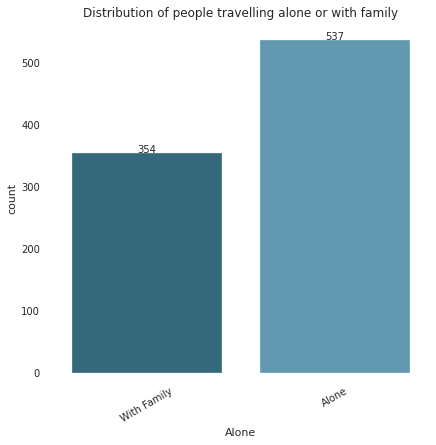

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train['Alone'], data = train, palette = 'PuBuGn_d')
graph.set_title('Distribution of people travelling alone or with family', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

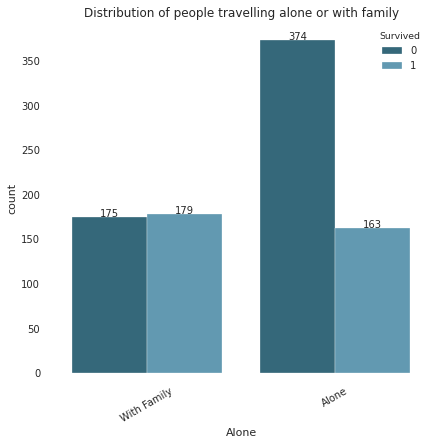

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train['Alone'], data = train, hue = 'Survived', palette = 'PuBuGn_d')
graph.set_title('Distribution of people travelling alone or with family', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

- We can see that almost half number of people who are travelling with family survived whereas large number of people travelling alone did not survive.

- So, travelling alone or with family plays a major role in deciding the survival probability.

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Person,Alone
0,0,3,male,22.0,1,0,7.2500,S,Unknown,male,With Family
1,1,1,female,38.0,1,0,71.2833,C,C,female,With Family
2,1,3,female,26.0,0,0,7.9250,S,Unknown,female,Alone
3,1,1,female,35.0,1,0,53.1000,S,C,female,With Family
4,0,3,male,35.0,0,0,8.0500,S,Unknown,male,Alone


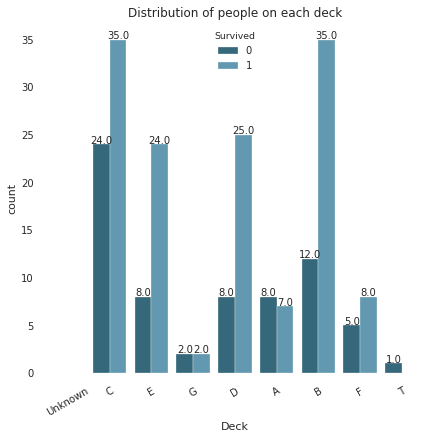

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train['Deck'], data = train[train.Deck != 'Unknown'], hue = 'Survived', palette = 'PuBuGn_d')
graph.set_title('Distribution of people on each deck', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

- The people who are on deck `C` and `B` have larger probability of survival.

## **6.3 Correlation of features with target** <a class="anchor" id="6.3"></a>

In [ ]:
train.corr(numeric_only=True)['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.066309
SibSp      -0.035322
Parch       0.081629
Fare        0.318097
Name: Survived, dtype: float64

- We can see that `Survived` is negatively correlated with `Pclass`,`Age`,`SibSp`,`Embarked`,`Deck`,`Person`,`Alone` and positively correlated with `Parch` and `Fare`.

- We can also plot a heatmap to visualize the relationship between features.

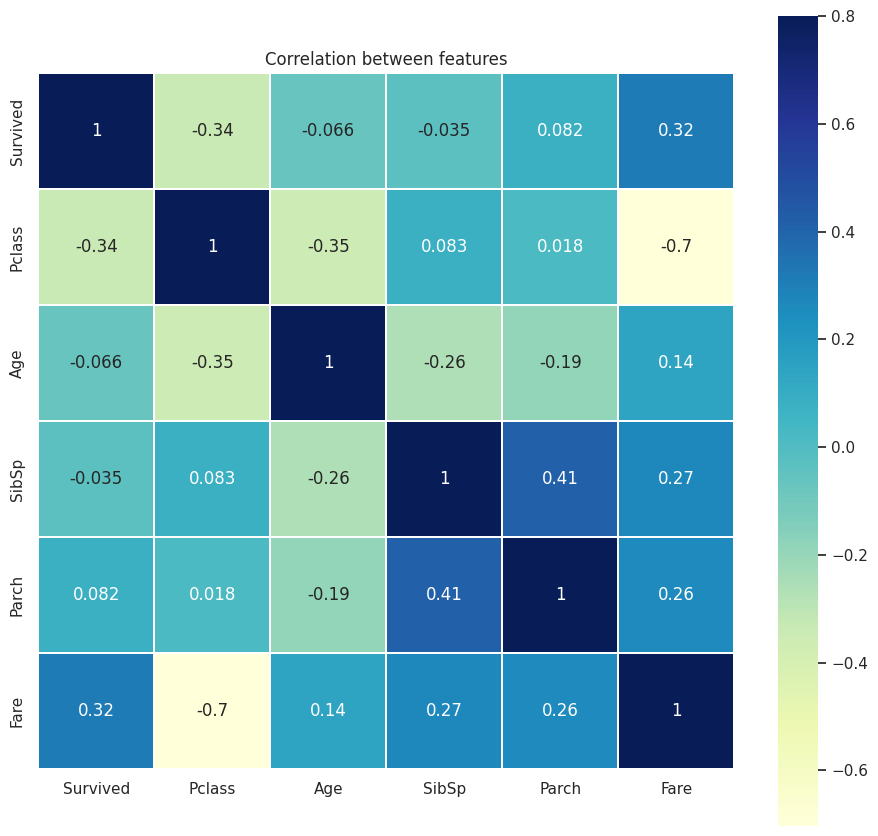

In [ ]:
corr=train.corr(numeric_only=True)#["Survived"]
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')
plt.show()

# **7. Categorical Variable Encoding** <a class="anchor" id="7"></a>

- Now, let's take a look at train and test set.

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Person,Alone
0,0,3,male,22.0,1,0,7.2500,S,Unknown,male,With Family
1,1,1,female,38.0,1,0,71.2833,C,C,female,With Family
2,1,3,female,26.0,0,0,7.9250,S,Unknown,female,Alone
3,1,1,female,35.0,1,0,53.1000,S,C,female,With Family
4,0,3,male,35.0,0,0,8.0500,S,Unknown,male,Alone


- Drop the `Sex` variable.

In [ ]:
train.drop('Sex', axis=1, inplace=True)
test.drop('Sex', axis=1, inplace=True)

- There are 4 variables that need to be categorical encoded.

- They are `Embarked`,`Deck`,`Person` and `Alone`

In [ ]:
# train['Alone'] = pd.get_dummies(train['Alone'])
# test['Alone'] = pd.get_dummies(test['Alone'])

train['Alone'] = train['Alone'].map({'With Family': 0, 'Alone': 1})
test['Alone'] = test['Alone'].map({'With Family': 0, 'Alone': 1})

In [ ]:
labelenc=LabelEncoder()

categorical=['Embarked','Deck','Person']
for col in categorical:
    train[col]=labelenc.fit_transform(train[col])
    test[col]=labelenc.fit_transform(test[col])

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Deck,Person,Alone
0,0,3,22.0,1,0,7.2500,2,8,2,0
1,1,1,38.0,1,0,71.2833,0,2,1,0
2,1,3,26.0,0,0,7.9250,2,8,1,1
3,1,1,35.0,1,0,53.1000,2,2,1,0
4,0,3,35.0,0,0,8.0500,2,8,2,1


In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Deck,Person,Alone
0,3,34.5,0,0,7.8292,1,7,2,1
1,3,47.0,1,0,7.0000,2,7,1,0
2,2,62.0,0,0,9.6875,1,7,2,1
3,3,27.0,0,0,8.6625,2,7,2,1
4,3,22.0,1,1,12.2875,2,7,1,0


# **8. Feature Scaling** <a class="anchor" id="8"></a>

- We need to do Feature Scaling first before proceeding with modeling.

In [ ]:
train_cols = train.columns
test_cols = test.columns

In [ ]:
scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

# **9. Modelling** <a class="anchor" id="9"></a>

In [ ]:
# Declare feature vector and target variable
X = train.drop(labels = ['Survived'],axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **9.1 Predict accuracy with different algorithms** <a class="anchor" id="9.1"></a>


- I predict accuracy with 15 popular classifiers and evaluate their performance.

In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting",
         "LDA", "QDA", "Neural Net", "LightGBM", "XGBoost" ]



In [ ]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier(verbosity=-1),
    xgb.XGBClassifier()
   ]

In [ ]:

accuracy_scores = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8237
Nearest Neighbors  :  0.7797
Naive Bayes  :  0.7424
Linear SVM  :  0.7864
RBF SVM  :  0.7729
Gaussian Process  :  0.8373
Decision Tree  :  0.8237
Random Forest  :  0.8034
AdaBoost  :  0.8305
Gradient Boosting  :  0.8203
LDA  :  0.8068
QDA  :  0.7763
Neural Net  :  0.8407
LightGBM  :  0.8102
XGBoost  :  0.8034


In [ ]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.8237
1,Nearest Neighbors,0.7797
2,Naive Bayes,0.7424
3,Linear SVM,0.7864
4,RBF SVM,0.7729
5,Gaussian Process,0.8373
6,Decision Tree,0.8237
7,Random Forest,0.8203
8,AdaBoost,0.8305
9,Gradient Boosting,0.8203


- The accuracy score of top performing algorithms in descending order is given below -

In [ ]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
5,Gaussian Process,0.8373
12,Neural Net,0.8373
8,AdaBoost,0.8305
0,Logistic Regression,0.8237
6,Decision Tree,0.8237
9,Gradient Boosting,0.8203
13,LightGBM,0.8102
7,Random Forest,0.8068
10,LDA,0.8068
14,XGBoost,0.8034


## **9.2 Plot the classifier accuracy scores** <a class="anchor" id="9.2"></a>

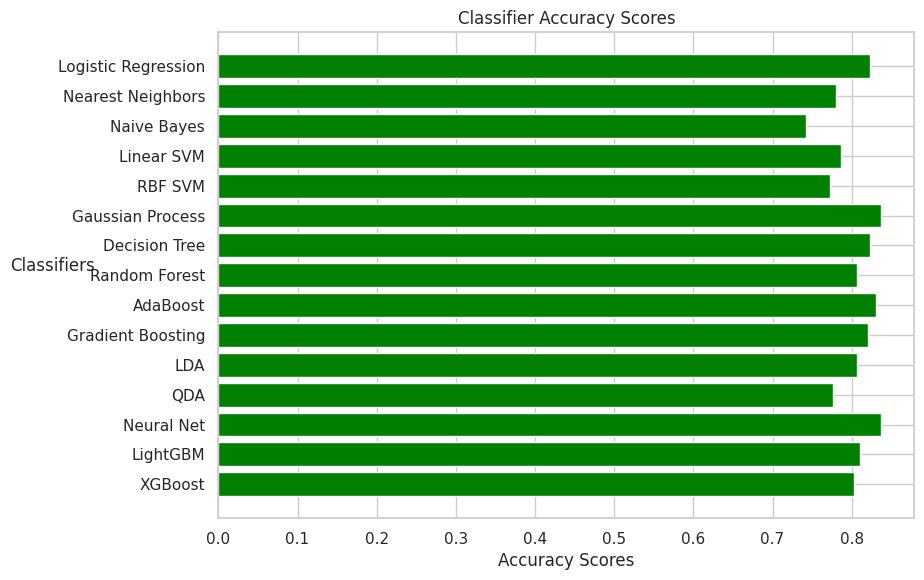

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
x = classifiers_performance['Accuracy Scores']
y = classifiers_performance['Classifiers']
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Scores')
ax.set_ylabel('Classifiers', rotation=0)
ax.set_title('Classifier Accuracy Scores')
plt.show()

# **10. Feature Selection** <a class="anchor" id="10"></a>

- In this section, we will see how to improve model performance by feature selection.

- We will visualize feature importance with random forest classifier and drop the least important feature, rebuild the model and check effect on accuracy.  


## **10.1 Feature Importance with Random Forest model** <a class="anchor" id="10.1"></a>

- Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

- First, I will create the Random Forest model as follows:-

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Person      0.256870
Fare        0.242757
Age         0.193414
Pclass      0.087882
Deck        0.074787
SibSp       0.049450
Embarked    0.043930
Parch       0.034210
Alone       0.016700
dtype: float64

In [ ]:
feature_scores.values

array([0.25686976, 0.24275709, 0.19341442, 0.08788205, 0.07478711,
       0.04945003, 0.04392974, 0.03420959, 0.01670021])

In [ ]:
feature_scores.index

Index(['Person', 'Fare', 'Age', 'Pclass', 'Deck', 'SibSp', 'Embarked', 'Parch',
       'Alone'],
      dtype='object')

- We can see that the most important feature is `Person` and least important feature is `Alone`.

## **10.2 Visualize feature scores** <a class="anchor" id="10.2"></a>


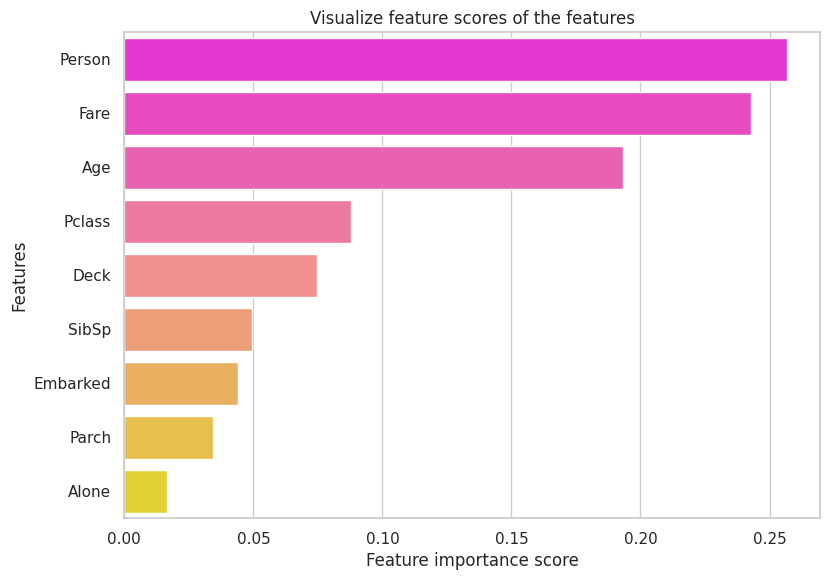

In [ ]:
# Creating a seaborn bar plot to visualize feature scores
f, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=feature_scores.values, y=feature_scores.index, palette='spring')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## **10.3 Drop least important feature** <a class="anchor" id="10.3"></a>

- Now, I will drop the least important feature `Alone` from the model, rebuild the model and check its effect on accuracy.

In [ ]:
# drop the least important feature from X_train, X_test and test set for further analysis
X1_train = X_train.drop(['Alone'], axis=1)
X1_test = X_test.drop(['Alone'], axis=1)
test = test.drop(['Alone'], axis=1)

KeyError: "['Alone'] not found in axis"

In [ ]:
accuracy_scores1 = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X1_train, y_train)
    score = clf.score(X1_test, y_test)
    score = round(score, 4)
    accuracy_scores1.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8169
Nearest Neighbors  :  0.8068
Naive Bayes  :  0.7458
Linear SVM  :  0.7898
RBF SVM  :  0.7729
Gaussian Process  :  0.8441
Decision Tree  :  0.8237
Random Forest  :  0.7797
AdaBoost  :  0.8305
Gradient Boosting  :  0.8237
LDA  :  0.8
QDA  :  0.7864
Neural Net  :  0.8373
LightGBM  :  0.8136
XGBoost  :  0.7966


In [ ]:
classifiers_performance1 = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores,
                                         "Accuracy Scores1": accuracy_scores1})
classifiers_performance1

,Classifiers,Accuracy Scores,Accuracy Scores1
0,Logistic Regression,0.8237,0.8169
1,Nearest Neighbors,0.7797,0.8068
2,Naive Bayes,0.7424,0.7458
3,Linear SVM,0.7864,0.7898
4,RBF SVM,0.7729,0.7729
5,Gaussian Process,0.8373,0.8441
6,Decision Tree,0.8237,0.8237
7,Random Forest,0.8034,0.7797
8,AdaBoost,0.8305,0.8305
9,Gradient Boosting,0.8203,0.8237


- We can see that `Gaussian Process` has the maximum accuracy of 0.8441.

- We will use the `Gaussian Process Classifier` to plot the confusion-matrix.


# **11. Confusion matrix** <a class="anchor" id="11"></a>


- A **confusion matrix** is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

- Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- **True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- **True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- **False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called **Type I error**.

- **False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error**.

- These four outcomes are summarized in a confusion matrix.

- We will use the `Gaussian Process Classifier` to plot the confusion-matrix.


In [ ]:
# instantiate the XGBoost classifier
gpc_clf = GaussianProcessClassifier(1.0 * RBF(1.0))


# fit the classifier to the modified training set
gpc_clf.fit(X1_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [ ]:
# predict on the test set
y1_pred = gpc_clf.predict(X1_test)


In [ ]:
# print the accuracy
print('Gaussian Process Classifier model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y1_pred)))

Gaussian Process Classifier model accuracy score: 0.8441


In [ ]:
# print confusion-matrix

cm = confusion_matrix(y_test, y1_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[156  19]
 [ 27  93]]

True Positives(TP) =  156

True Negatives(TN) =  93

False Positives(FP) =  19

False Negatives(FN) =  27


The confusion matrix shows 156 + 93 = 249 correct predictions and 19 + 27 = 46 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 156
- True Negatives (Actual Negative:0 and Predict Negative:0) - 93
- False Positives (Actual Negative:0 but Predict Positive:1) - 19 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 27 (Type II error)

<Axes: >

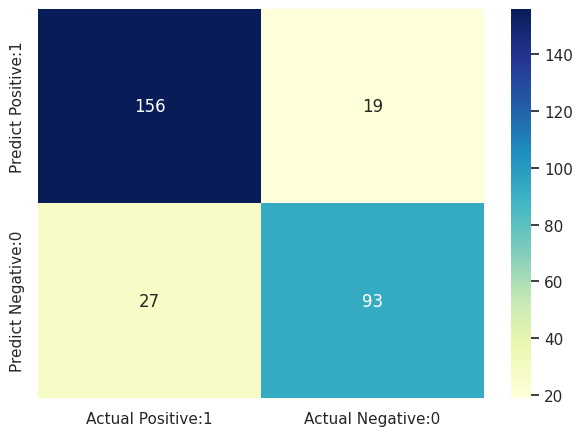

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **12. Classification Metrices** <a class="anchor" id="12"></a>

## **12.1 Classification Report** <a class="anchor" id="12.1"></a>

- **Classification Report** is another way to evaluate the classification model performance.
- It displays the **precision**, **recall**, **f1** and **support** scores for the model.
- We can print a classification report as follows:-

In [ ]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       175
           1       0.83      0.78      0.80       120

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



## **12.2 Classification Accuracy** <a class="anchor" id="12.2"></a>


In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8441


## **12.3 Classification Error** <a class="anchor" id="12.3"></a>

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1559


## **12.4 Precision** <a class="anchor" id="12.4"></a>
- **Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

- So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

- Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [ ]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8914


## **12.5 Recall** <a class="anchor" id="12.5"></a>

- **Recall** can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).

- **Recall** is also called **Sensitivity**.

- Recall identifies the proportion of correctly predicted actual positives.

- Mathematically, Recall can be given as the ratio of TP to (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8525


## **12.6 True Positive Rate** <a class="anchor" id="12.6"></a>

- **True Positive Rate** is synonymous with **Recall**.

In [ ]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8525


## **12.7 False Positive Rate** <a class="anchor" id="12.7"></a>

In [ ]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1696


## **12.8 Specificity (True Negative Rate)** <a class="anchor" id="12.8"></a>

- **Specificity** is also called **True Negative Rate**.

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8304


## **12.9 f1-score** <a class="anchor" id="12.9"></a>

- **f1-score** is the weighted harmonic mean of precision and recall.
- The best possible f1-score would be 1.0 and the worst would be 0.0.
- f1-score is the harmonic mean of precision and recall.
- So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
- The weighted average of f1-score should be used to compare classifier models, not global accuracy.

## **12.10 Support** <a class="anchor" id="12.10"></a>

- Support is the actual number of occurrences of the class in our dataset.

# **13. Cross Validation** <a class="anchor" id="13"></a>


In [ ]:
# iterate over classifiers and calculate cross-validation score
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X1_train, y_train, cv = 10, scoring='accuracy')
    print(name , ':{:.4f}'.format(scores.mean()))


Logistic Regression :0.8055
Nearest Neighbors :0.7719
Naive Bayes :0.7297
Linear SVM :0.7668
RBF SVM :0.7853
Gaussian Process :0.8170
Decision Tree :0.7919
Random Forest :0.7700
AdaBoost :0.8088
Gradient Boosting :0.8289
LDA :0.7869
QDA :0.7448
Neural Net :0.8070
LightGBM :0.8155
XGBoost :0.7955


- It can be seen that cross-validation does not result in improved performance.

# **14. Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="14"></a>

- I choose the top 3 classifiers with maximum accuracy for ensemble modeling.

- They are `AdaBoost`, `LightGBM` and `Gradient Boosting`.

- So, we will tune the hyperparameters of these models before proceeding.


### **AdaBoost Classifier Parameters tuning**

In [ ]:
abc_params = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

dtc_clf = DecisionTreeClassifier(random_state = 0, max_features = "auto", class_weight = "balanced", max_depth = None)

abc_clf = AdaBoostClassifier(base_estimator = dtc_clf)


abc_grid_search = GridSearchCV(estimator = abc_clf,
                               param_grid = abc_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


abc_grid_search.fit(X1_train, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=0)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2]},
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('AdaBoost GridSearch CV best score : {:.4f}\n\n'.format(abc_grid_search.best_score_))

# print parameters that give the best results
print('AdaBoost Parameters that give the best results :','\n\n', (abc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
abc_best = abc_grid_search.best_estimator_
print('\n\nXGBoost Estimator that was chosen by the search :','\n\n', (abc_best))

AdaBoost GridSearch CV best score : 0.7718


AdaBoost Parameters that give the best results : 

 {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 2}


XGBoost Estimator that was chosen by the search : 

 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_features='auto',
                                                         random_state=0,
                                                         splitter='random'),
                   n_estimators=2)


### **LightGBM Parameters tuning**

In [ ]:
lgb_clf = lgb.LGBMClassifier(verbosity=-1)


lgb_params={'learning_rate': [0.005],
    'num_leaves': [6,8,12,16],
    'objective' : ['binary'],
    'colsample_bytree' : [0.5, 0.6],
    'subsample' : [0.65,0.66],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }


lgb_grid_search = GridSearchCV(estimator = lgb_clf,
                               param_grid = lgb_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


lgb_grid_search.fit(X1_train, y_train)


GridSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1),
             param_grid={'colsample_bytree': [0.5, 0.6],
                         'learning_rate': [0.005], 'num_leaves': [6, 8, 12, 16],
                         'objective': ['binary'], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.65, 0.66]},
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('LightGBM GridSearch CV best score : {:.4f}\n\n'.format(lgb_grid_search.best_score_))

# print parameters that give the best results
print('LightGBM Parameters that give the best results :','\n\n', (lgb_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
lgb_best = lgb_grid_search.best_estimator_
print('\n\nLightGBM Estimator that was chosen by the search :','\n\n', (lgb_best))

LightGBM GridSearch CV best score : 0.7483


LightGBM Parameters that give the best results : 

 {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'num_leaves': 6, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.65}


LightGBM Estimator that was chosen by the search : 

 LGBMClassifier(colsample_bytree=0.6, learning_rate=0.005, num_leaves=6,
               objective='binary', reg_alpha=1, reg_lambda=1, subsample=0.65)


### **Gradient Boost Parameters tuning**

In [ ]:
gbc_clf = GradientBoostingClassifier()

gbc_params = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gbc_grid_search = GridSearchCV(estimator = gbc_clf,
                               param_grid = gbc_params,
                               scoring = "accuracy",
                               cv = 5,
                               verbose = 0)

gbc_grid_search.fit(X1_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('Gradient Boosting GridSearch CV best score : {:.4f}\n\n'.format(gbc_grid_search.best_score_))

# print parameters that give the best results
print('Gradient Boosting Parameters that give the best results :','\n\n', (gbc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
gbc_best = gbc_grid_search.best_estimator_
print('\n\nGradient Boosting Estimator that was chosen by the search :','\n\n', (gbc_best))

Gradient Boosting GridSearch CV best score : 0.8340


Gradient Boosting Parameters that give the best results : 

 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.1, 'min_samples_leaf': 100, 'n_estimators': 100}


Gradient Boosting Estimator that was chosen by the search : 

 GradientBoostingClassifier(loss='deviance', max_depth=8, max_features=0.1,
                           min_samples_leaf=100)


# **18. Credits** <a class="anchor" id="18"></a>

- This notebook is based on couple of excellent notebooks on titanic dataset. These are -

  - [Titanic top 4 % ensemble modeling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)

  - [Titanic Survival Prediction End to End ML Pipeline](https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline)